# Linear Regression Model

### In this model I'm trying to predict the percentage of marks that a student with obtain in his exams based on the number of hours. This linear regression won't be accurate as there is major flaw with projecting model as quality study hours and retention ratio is very important to determine two variables.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
try:
    data = pd.read_csv(url)
    data.head()
except:
    print("Error! importing Data")

In [3]:
# shape and dataset
data.shape,data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


((25, 2), None)

In [4]:
# check the description of student_score data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

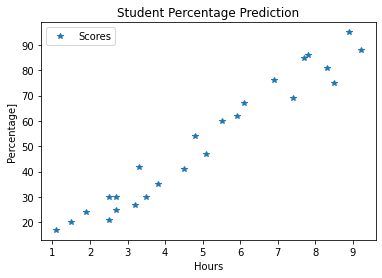

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Student Percentage Prediction')  
plt.xlabel('Hours')  
plt.ylabel('Percentage]')  
plt.show()

## Linear Regression Model
There is a positive linear relation between the number of hours and percentage scored.

In [6]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

# Training the model

### Spliting Dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.80,test_size=0.20,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression().fit(X_train, Y_train)
Y_predict= linearRegressor.predict(X_test)

### Training the Algorithm

In [9]:
regressor = LinearRegression().fit(X_train, Y_train)

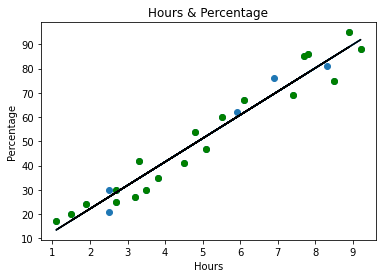

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.scatter(X_train,Y_train,color='green')
plt.plot(X, line);
plt.plot(X_train,regressor.predict(X_train),color="black")
plt.title('Hours & Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')
plt.show()

### Checking test scores for training set

In [11]:
print('Test Score', regressor.score(X_test, Y_test))
print('Training Score', regressor.score(X_train, Y_train))

Test Score 0.9678055545167994
Training Score 0.9491209376364416


In [12]:
print('X_test', X_test)      

print('Y_predict', Y_predict)

X_test [[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
Y_predict [83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [13]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
data

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [14]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25hrs',regressor.predict([[9.25]]))

Score of student who studied for 9.25hrs [92.38611528]


### Model Evaluation Metrics

In [15]:
#Checking the efficiency of model

mse = mean_squared_error(Y_test, Y_predict)

print("Mean Squred Error:",mse)

mae = mean_absolute_error(Y_test, Y_predict)

print("Mean absolute Error:",mae)

Mean Squred Error: 18.943211722315272
Mean absolute Error: 3.9207511902099244
